<a href="https://colab.research.google.com/github/rbolsoni/Portfolio-Data-Science/blob/master/Analisando_os_Dados_do_Airbnb_(Boston).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="100%" src="https://miro.medium.com/max/700/1*6Z03TsdOBAnPYQSjW8rAJQ.png">

[![author](https://img.shields.io/badge/author-rbolsoni-orange.svg)](www.linkedin.com/in/rafabolsoni) 
[![author](https://img.shields.io/badge/see%20more-projects-brightgreen.svg)](https://github.com/rbolsoni) 

---

# Análise dos Dados do Airbnb - *Boston*

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais e gerando milhões de dados de locais para alugar e de usuarios que alugam, ou seja um prato cheio para os Cientistas de Dados analiserem e tirarem diversos insights sobre o comportamento de quem usa esse serviço.
 

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="30%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Boston, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:
*   *listings.csv* - Summary information and metrics for listings in Boston (good for visualisations).


In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/united-states/ma/boston/2020-04-14/visualisations/listings.csv')


## Análise dos Dados
Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

**Dicionário das variáveis**

* id - número de id gerado para identificar o imóvel
* name - nome da propriedade anunciada
* host_id - número de id do proprietário (anfitrião) da propriedade
* host_name - Nome do anfitrião
* neighbourhood_group - esta coluna não contém nenhum valor válido
* neighbourhood - nome do bairro
* latitude - coordenada da latitude da propriedade
* longitude - coordenada da longitude da propriedade
* room_type - informa o tipo de quarto que é oferecido
* price - preço para alugar o imóvel
* minimum_nights - quantidade mínima de noites para reservar
* number_of_reviews - número de reviews que a propriedade possui
* last_review - data do último review
* reviews_per_month - quantidade de reviews por mês
* calculated_host_listings_count - quantidade de imóveis do mesmo anfitrião
* availability_365 - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [14]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,3781,HARBORSIDE-Walk to subway,4804,Frank,NaN,East Boston,42.36413,-71.02991,Entire home/apt,125,28,16,2019-12-21,0.28,1,97
1,5506,**$49 Special ** Private! Minutes to center!,8229,Terry,NaN,Roxbury,42.32981,-71.09559,Entire home/apt,145,3,106,2019-10-31,0.79,6,307
2,6695,$99 Special!! Home Away! Condo,8229,Terry,NaN,Roxbury,42.32994,-71.09351,Entire home/apt,169,3,115,2019-11-02,0.88,6,266
3,8789,Curved Glass Studio/1bd facing Park,26988,Anne,NaN,Downtown,42.35919,-71.06265,Entire home/apt,99,91,24,2019-09-30,0.35,8,290
4,10730,Bright 1bed facing Golden Dome,26988,Anne,NaN,Downtown,42.35840,-71.06185,Entire home/apt,150,91,31,2019-12-01,0.24,8,42


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [18]:
# identificar o volume de dados do DataFrame
print(f'Entradas:\t {df.shape[0]}')
print(f'Variáveis:\t {df.shape[1]}\n')

# verificar as 5 primeiras entradas do dataset
print(f'{df.dtypes}')

Entradas:	 3845
Variáveis:	 16

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**
A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna neighbourhood_group possui 100% dos seus valores faltantes.
* As variáveis reviews_per_month e last_review possuem valores nulos em 21% das linhas.
* As outras variaveis não possuem valores nulos

In [60]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
((df.isnull().sum() / df.shape[0]) * 100).sort_values(ascending=False)

neighbourhood_group               100.000000
reviews_per_month                  21.456437
last_review                        21.456437
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
minimum_nights                      0.000000
price                               0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_name                           0.000000
host_id                             0.000000
name                                0.000000
id                                  0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma.

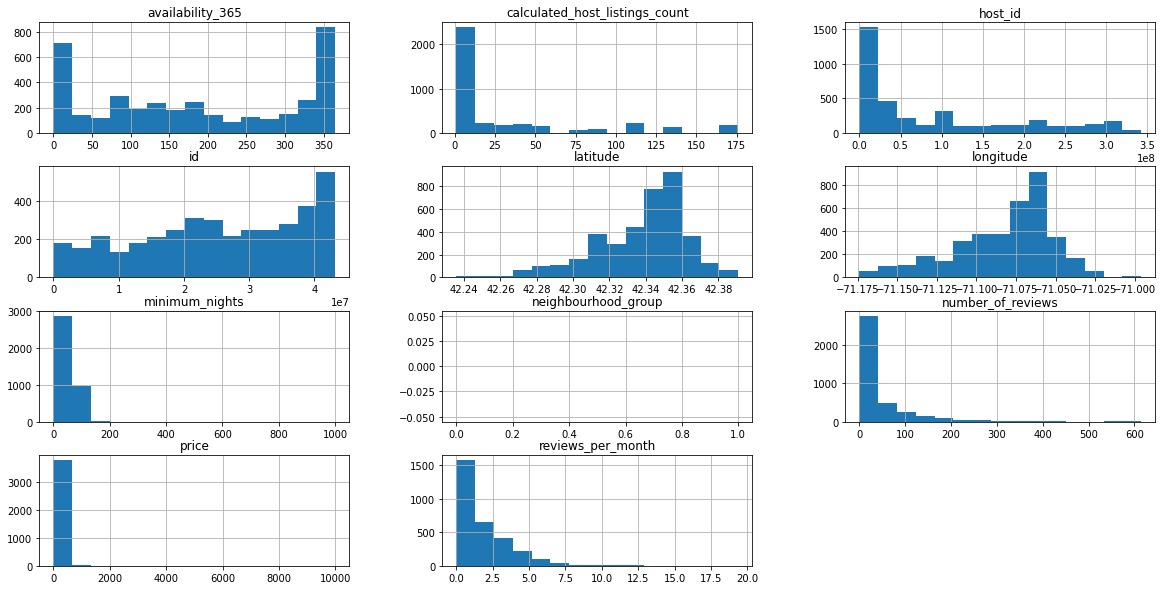

In [27]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(20,10));

### **Q4. Há outliers presentes?**
Pela distribuição do histograma, é possível verificar indícios da presença de outliers. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de outliers. São elas:

* Resumo estatístico por meio do método describe()
* Plotar boxplots para a variável.

In [28]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3845.000000,3845.000000,3845.000000,3020.000000,3845.000000,3845.000000
mean,182.451235,32.017685,39.779974,1.827662,31.626268,185.347724
std,407.777077,42.597891,67.862814,1.872423,48.155154,133.262730
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,79.000000,2.000000,1.000000,0.400000,2.000000,70.000000
50%,133.000000,9.000000,11.000000,1.220000,6.000000,176.000000
75%,200.000000,91.000000,46.000000,2.700000,42.000000,327.000000
max,10000.000000,1000.000000,615.000000,19.380000,176.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A quantidade de noite minima (`minimum_nights`) está acima de 365 por ano
* A variável `price` possui 75% do valor abaixo de 200, porém seu valor máximo é 10000.
* Tem valores na variavel `price` como 0


Boxplot para `minimum_nights`

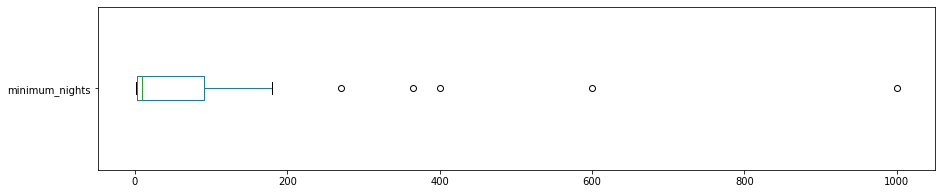

minimum_nights: valores acima de 30:
1199 entradas
31.1834%


In [31]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print(f"{len(df[df.minimum_nights > 30])} entradas")
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

Boxplot para `price`

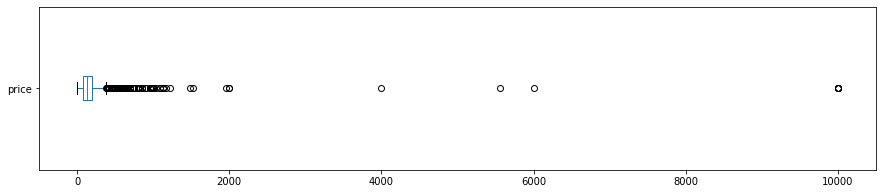


price: valores acima de 1500
12 entradas
0.3121%

price: valores abaixo de 1500
3832 entradas
99.6619%


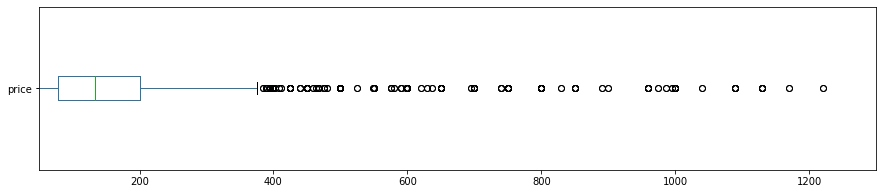

In [46]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 1500")
print(f"{len(df[df.price > 1500])} entradas")
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

# segundo grafico com melhor visualização

df.price.plot(kind='box', vert=False, xlim=(50,1300), figsize=(15,3));

print("\nprice: valores abaixo de 1500")
print(f"{len(df[df.price < 1300])} entradas")
print("{:.4f}%".format((len(df[df.price < 1300]) / df.shape[0])*100))

# boxplot sem valores menores que 50

df.price.plot(kind='box', vert=False, xlim=(50,1300), figsize=(15,3));



Histogramas sem outliers

Já que identificamos outliers nas variáveis `price` e `minimum_nights`, vamos agora limpar o DataFrame delas e plotar novamente o histograma.

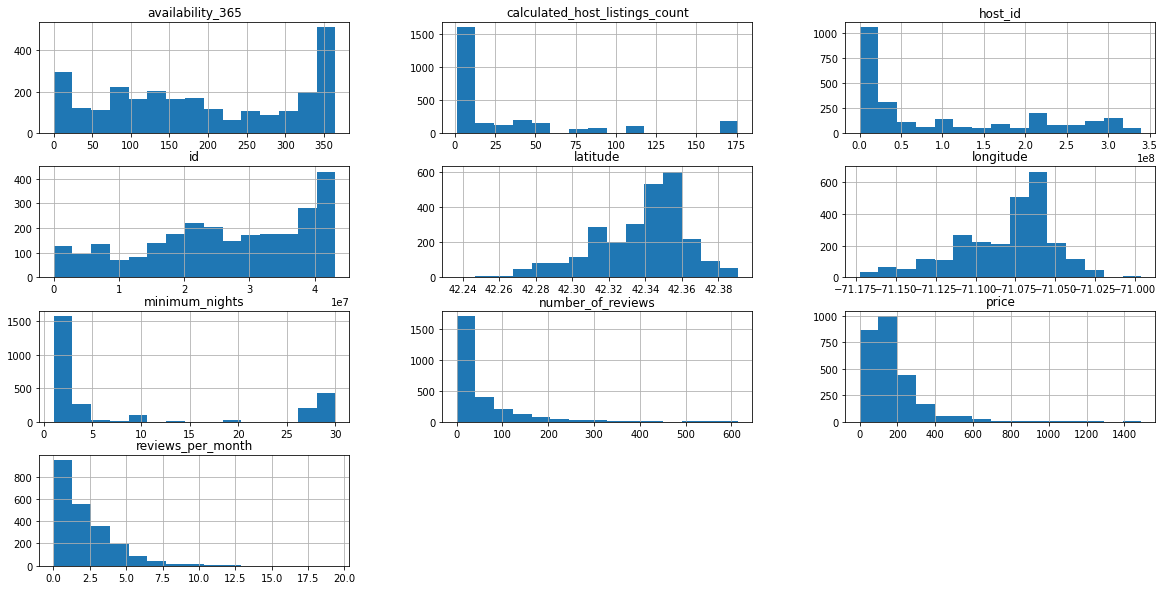

In [48]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(20,10));

In [53]:
# ver a média da coluna `price``
df_clean['price'].describe()


count    2636.000000
mean      169.455615
std       141.573582
min         0.000000
25%        80.000000
50%       133.000000
75%       200.000000
max      1490.000000
Name: price, dtype: float64

### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um heatmap a partir dessa matriz, usando a biblioteca `seaborn`

In [54]:
# criar uma matriz de correlação
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()


# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.118030,-0.105786,-0.104285,0.005571,0.057892
minimum_nights,-0.118030,1.000000,-0.192242,-0.289503,0.393557,0.155080
number_of_reviews,-0.105786,-0.192242,1.000000,0.676075,-0.208829,-0.009099
reviews_per_month,-0.104285,-0.289503,0.676075,1.000000,-0.265062,-0.065341
calculated_host_listings_count,0.005571,0.393557,-0.208829,-0.265062,1.000000,0.068056
availability_365,0.057892,0.155080,-0.009099,-0.065341,0.068056,1.000000


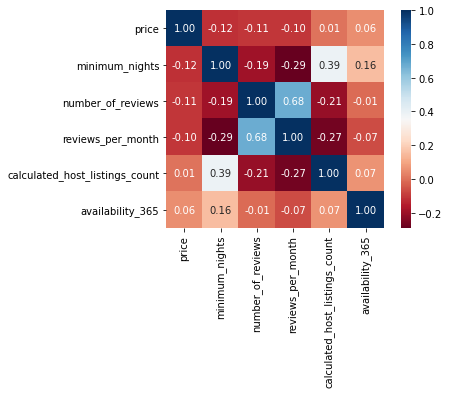

In [55]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [56]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    1608
Private room        990
Hotel room           26
Shared room          12
Name: room_type, dtype: int64

In [61]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(df_clean.room_type.value_counts() / df_clean.shape[0]) * 100

Entire home/apt    61.001517
Private room       37.556904
Hotel room          0.986343
Shared room         0.455235
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros `(neighbourhoods)` a partir do preço de locação.


In [62]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
South Boston Waterfront    302.761905
West End                   271.303030
Mission Hill               255.928571
Fenway                     254.546053
Back Bay                   239.787402
Charlestown                210.924528
Beacon Hill                198.886364
Downtown                   190.820789
Chinatown                  188.068966
Longwood Medical Area      179.250000
Name: price, dtype: float64

In [78]:
# ver preços de bairros mais baratos na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[15:]

neighbourhood
Roxbury          160.467532
Jamaica Plain    153.184332
East Boston      129.491803
Allston          116.309524
Brighton         115.009434
Dorchester       110.788889
West Roxbury     103.920000
Roslindale       102.169811
Hyde Park         93.045455
Mattapan          69.447368
Name: price, dtype: float64

In [82]:
# ver preço x tipo x bairro
df_clean.groupby(['neighbourhood', 'room_type']).price.mean().sort_values(ascending=False)[:15]

neighbourhood            room_type      
South Boston Waterfront  Entire home/apt    321.263158
West End                 Entire home/apt    283.918033
Mission Hill             Entire home/apt    277.623377
Fenway                   Entire home/apt    263.915493
Back Bay                 Entire home/apt    256.280374
Charlestown              Entire home/apt    250.766667
South Boston             Entire home/apt    212.051020
Beacon Hill              Entire home/apt    207.654321
Jamaica Plain            Entire home/apt    203.009709
Bay Village              Entire home/apt    200.269231
Dorchester               Entire home/apt    199.026316
North End                Entire home/apt    198.854167
Downtown                 Private room       193.333333
                         Entire home/apt    193.131356
Roxbury                  Entire home/apt    191.894737
Name: price, dtype: float64

Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se x=longitude e y=latitude.

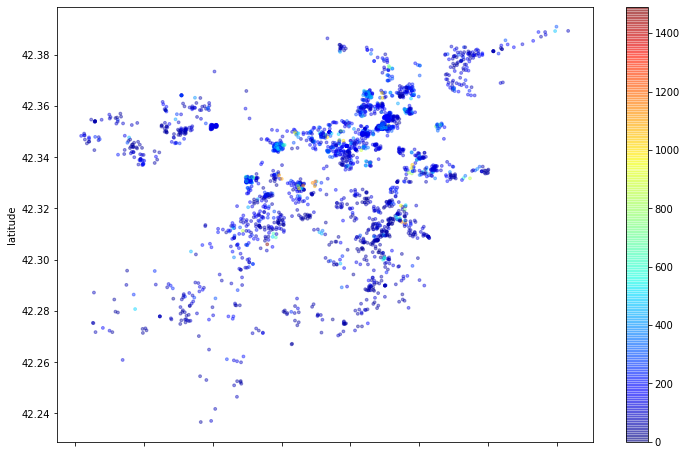

In [65]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

Mapa da cidade de Boston para realizar um comparativo

![alt text](https://www.wheretraveler.com/sites/default/files/styles/promoted_image/public/Boston-Downtown-Map.jpg?itok=w29v-_-_&timestamp=1456773924)

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Podemos tambem descobrir qual a média de noite minima para cada tipo de hospedagem.

In [71]:
# ver a média da coluna `minimum_nights``
df_clean.groupby(['room_type']).minimum_nights.mean().sort_values(ascending=False)[:10]

room_type
Entire home/apt    9.557836
Private room       7.758586
Shared room        1.250000
Hotel room         1.000000
Name: minimum_nights, dtype: float64

## Conclusões


Analise do tecnica do dataset:
* Ja se percebe alguns outliers e algumas variaveis
* Algumas localidades com poucos imoveis que podem distorcer os dados

Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.

Porém, algumas conclusões preliminares podem ser tiradas com essa analise superficial dos dados de hospedagem do AirBnB de Boston.
* Apartamentos inteiros tem uma tendencia de exigir maior numero de noites minimas
* Os bairros mais caros são: South Boston Waterfront, West End e Mission Hill  
* Os bairros mais baratos são: Mattapan, Hyde Park, Roslindale

